  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)  \
0      C_1           20             6                 2           386   
1      C_2           16             3                 6           289   
2      C_3           27             6                 2           393   
3      C_4           19             1                 2           110   
4      C_5           24             4                 2           280   

   Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  ...  \
0         NaN         NaN         NaN         NaN         NaN  ...   
1         NaN         NaN         NaN         NaN         NaN  ...   
2         NaN         NaN         NaN         NaN         NaN  ...   
3         NaN         NaN         NaN         NaN         NaN  ...   
4         NaN         NaN         NaN         NaN         NaN  ...   

   Unnamed: 12  Unnamed: 13  Unnamed: 14  Unnamed: 15  Unnamed: 16  \
0          NaN          NaN          NaN          NaN          NaN   


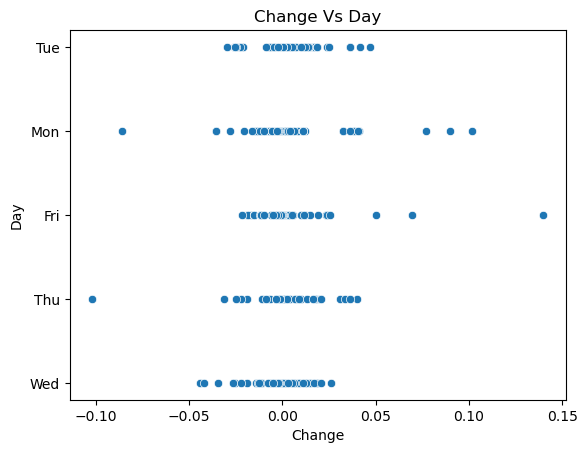

Probability of positive change on Wednesdays: 0.42
Probability of positive change across all days: 0.08433734939759036


In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from the Excel file

df = pd.read_excel(r'C:\Users\year2\Desktop\Lab Session Data.xlsx', sheet_name='Purchase data')

# Display the first few rows of the dataset
print(df.head())

# A: Extracting relevant columns
A = df.iloc[:, 1:4]
print("A:\n", A)

C = df.iloc[:, 4:5]
print("C:\n", C)

# Q1: Print the shape of the dataframe and ranks of matrices A and C
print("DataFrame shape:", df.shape)
print("Number of rows:", df.shape[0])

print("A's rank:", np.linalg.matrix_rank(A))
print("C's rank:", np.linalg.matrix_rank(C))

# A2: Calculate the pseudo-inverse and solve for X
x = np.linalg.pinv(A)
z = np.dot(x, C)
print("X:\n", z)

# A3: Classify payment as 'RICH' or 'POOR'
def rich_poor(pay):
    return "RICH" if pay > 200 else "POOR"

df['RICH OR POOR'] = df['Payment (Rs)'].apply(rich_poor)
print(df[['Customer', 'Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)', 'Payment (Rs)', 'RICH OR POOR']])

# A4: Load IRCTC stock price data
df1 = pd.read_excel(r'C:\Users\year2\Desktop\Lab Session Data.xlsx', sheet_name='IRCTC Stock Price')

# Display the first few rows
print(df1.head())

# Calculate mean and median of the 'Price' column
x = df1['Price']
print("Mean price:", x.mean())
print("Median price:", x.median())

# Calculate the mean price for Wednesdays
mean_wednesday_price = df1[df1['Day'] == 'Wed']['Price'].mean()
print("Mean price on Wednesdays:", mean_wednesday_price)

# Calculate the mean price for April
a_data = df1[df1['Month'] == 'Apr']
a_mean = a_data['Price'].mean()
print("Mean price in April:", a_mean)

# Calculate the population mean price
population_price_mean = df1['Price'].mean()
print("Population mean price:", population_price_mean)

# Calculate the proportion of days with a negative change percentage
LOSS = a_data['Chg%'].apply(lambda x: 1 if x < 0 else 0).mean()
print("Proportion of loss days in April:", LOSS)

# Plotting the Change vs Day
df1['Change'] = df1['Chg%'].apply(lambda x: float(str(x).rstrip('%')) if pd.notnull(x) else np.nan)
sns.scatterplot(x='Change', y='Day', data=df1)
plt.title('Change Vs Day')
plt.show()

# Conditional probability of positive change on Wednesdays
total_wednesdays = len(df1[df1['Day'] == 'Wed'])
positive_change_wednesday = len(df1[(df1['Day'] == 'Wed') & (df1['Change'] > 0)])
probability_wednesday_profit = positive_change_wednesday / total_wednesdays
print("Probability of positive change on Wednesdays:", probability_wednesday_profit)

# Additional probability check
total_days = len(df1)
probability_wed_profit = positive_change_wednesday / total_days
print("Probability of positive change across all days:", probability_wed_profit)


In [40]:
df2 = pd.read_excel(r'C:\Users\year2\Desktop\Lab Session Data.xlsx', sheet_name='thyroid0387_UCI')
df2

,Record ID,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Condition
0,840801013,29,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,NO CONDITION
1,840801014,29,F,f,f,f,f,f,f,f,...,t,128,f,?,f,?,f,?,other,NO CONDITION
2,840801042,41,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,11,other,NO CONDITION
3,840803046,36,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,NO CONDITION
4,840803047,32,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,36,other,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,870119022,56,M,f,f,f,f,f,f,f,...,t,64,t,0.83,t,77,f,?,SVI,NO CONDITION
9168,870119023,22,M,f,f,f,f,f,f,f,...,t,91,t,0.92,t,99,f,?,SVI,NO CONDITION
9169,870119025,69,M,f,f,f,f,f,f,f,...,t,113,t,1.27,t,89,f,?,SVI,I
9170,870119027,47,F,f,f,f,f,f,f,f,...,t,75,t,0.85,t,88,f,?,other,NO CONDITION


In [41]:
# Study each attribute and associated values present. Identify the datatype (nominal etc.) for the attribute. 

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Record ID                  9172 non-null   int64 
 1   age                        9172 non-null   int64 
 2   sex                        9172 non-null   object
 3   on thyroxine               9172 non-null   object
 4   query on thyroxine         9172 non-null   object
 5   on antithyroid medication  9172 non-null   object
 6   sick                       9172 non-null   object
 7   pregnant                   9172 non-null   object
 8   thyroid surgery            9172 non-null   object
 9   I131 treatment             9172 non-null   object
 10  query hypothyroid          9172 non-null   object
 11  query hyperthyroid         9172 non-null   object
 12  lithium                    9172 non-null   object
 13  goitre                     9172 non-null   object
 14  tumor   

65525


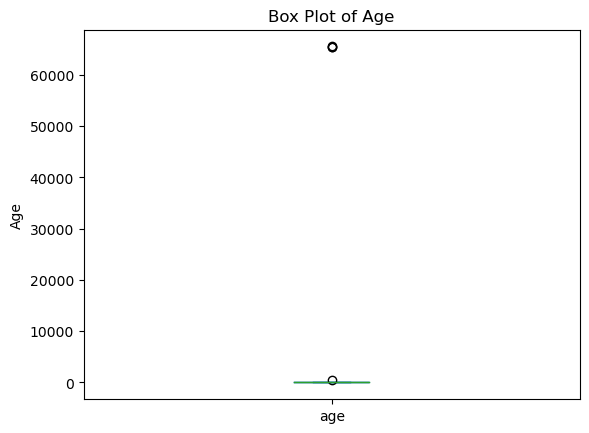

In [60]:
# Study the data range for numeric variables.

age_range=df2['age'].max()-(df2['age'].min())
print(age_range)

# Study presence of outliers in data.

import pandas as pd
import matplotlib.pyplot as plt

df2['age'].plot(kind = 'box')
plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.show()

In [61]:
# For numeric variables, calculate the mean and variance (or standard deviation). 
df2['age'].mean()

73.55582206716092

In [62]:
df2['age'].std()

1183.9767180444667